Тестовое задание
================

## SQL

В *SQLite* файле `issues.db` находится таблица `history`.

Таблица содержит следующие колонки:
* `issue_key` – уникальный ключ задачи
* `status` – статус задачи
* `minutes_in_status` – количество минут, которое задача находилась в статусе
* `previous_status` – предыдущий статус задачи
* `started_at` – время создания статуса задачи, unix миллисекунды
* `ended_at` – время перехода задачи в другой статус, unix миллисекунды

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Задача 1

Напишите запрос, который для всех задач, открытых на момент времени `T`, выведет:
* ключ задачи
* текущий статус (на момент `T`)
* время создания задачи

Задача считается открытой на момент времени `T`, если к этому времени последний статус задачи был любой кроме `Closed` и `Resolved`.

Оформите запрос таким образом, чтобы, изменив дату, его можно было использовать для поиска открытых задач в любой момент времени как в прошлом, так и в настоящем.

Переведите время в текстовое представление.

In [ ]:
import sqlite3 as sq

con = sq.connect('issues.db')
cur = con.cursor()
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
table = cur.fetchone()[0]

issues_df = pd.read_sql(sql=f'SELECT * FROM {table}', con=con)

In [ ]:
issues_df['started_at'] = pd.to_datetime(issues_df['started_at'])
issues_df['ended_at'] = pd.to_datetime(issues_df['ended_at'])

In [ ]:
T = '1970-01-01 00:27:50'
open_tasks = issues_df[(issues_df['status'] != 'Closed') & (issues_df['status'] != 'Resolved') & (issues_df['started_at'] < T) & (issues_df['ended_at'] > T)]
open_tasks[['issue_key', 'status', 'started_at']].reset_index(drop=True)

,issue_key,status,started_at
0,C-40460,In Owl,1970-01-01 00:27:49.897022965
1,C-40059,In Review,1970-01-01 00:27:49.919375235
2,C-37862,Blocked,1970-01-01 00:27:49.993160128
3,C-38984,Reopened,1970-01-01 00:27:48.507323238
4,B-4645,In Progress,1970-01-01 00:27:49.913190830
5,C-36721,In Owl,1970-01-01 00:27:48.771900771
6,C-35057,Reopened,1970-01-01 00:27:48.426592495
7,C-31154,In Owl,1970-01-01 00:27:43.174937909
8,A-52764,Waiting for integration,1970-01-01 00:27:49.736697440
9,A-52727,Open,1970-01-01 00:27:49.993820281


## Pandas

Файл `task_history.csv` содержит исторические данные системы сборки (e.g. *jenkins*, *teamcity*, etc.)

Каждая запись в истории описывает отдельный запуск задачи `build_name` на рабочей машине `worker`.<br/>
Для любого запуска известны автор `author` и проект `project`, в рамках которого был запущен расчет данной задачи.

In [ ]:
task_history_df = pd.read_csv('task_history.csv')

### Задача 2

Для каждой недели распечатайте топ-3 пользователей, потребивших наибольшее количество машиночасов. Выведите для данных пользователей процент потребленных ресурсов от общего объема расчетов за эту неделю.

In [ ]:
task_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162859 entries, 0 to 162858
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   task_id      162859 non-null  int64 
 1   start_time   162859 non-null  object
 2   finish_time  162859 non-null  object
 3   status       162859 non-null  object
 4   worker       162859 non-null  object
 5   build_name   162859 non-null  object
 6   author       162859 non-null  object
 7   project      162859 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.9+ MB


In [ ]:
task_history_df.head(3)

,task_id,start_time,finish_time,status,worker,build_name,author,project
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary


In [ ]:
task_history_df['start_time'] = pd.to_datetime(task_history_df['start_time'])
task_history_df['finish_time'] = pd.to_datetime(task_history_df['finish_time'])

In [ ]:
def get_week(value):
  return value.week

In [ ]:
task_history_df['current_week'] = task_history_df['start_time'].apply(get_week)

In [ ]:
def get_work_time(row):
  return (row['start_time'] - row['finish_time']).seconds

In [ ]:
task_history_df['work_time'] = task_history_df.apply(get_work_time, axis=1)

In [ ]:
task_history_df.head(3)

,task_id,start_time,finish_time,status,worker,build_name,author,project,current_week,work_time
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,25,86399
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,25,86399
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,25,86386


In [ ]:
current_week_author_grouped = task_history_df.groupby(['current_week', 'author'])['work_time'].sum().reset_index()

In [ ]:
current_week_author_grouped.head(3)

,current_week,author,work_time
0,25,Bendy Python,1418208373
1,25,Eric Ivanov,35192922
2,25,Eric Koltron,30899135


In [ ]:
total_work_time = current_week_author_grouped.groupby('current_week')['work_time'].sum().reset_index()

In [ ]:
total_work_time.head(3)

,current_week,work_time
0,25,3172149416
1,26,3350296542
2,27,3628913446


In [ ]:
current_week_author_time_grouped = current_week_author_grouped.merge(total_work_time, on='current_week', suffixes=('', '_total'))

In [ ]:
current_week_author_time_grouped.head(3)

,current_week,author,work_time,work_time_total
0,25,Bendy Python,1418208373,3172149416
1,25,Eric Ivanov,35192922,3172149416
2,25,Eric Koltron,30899135,3172149416


In [ ]:
current_week_author_time_grouped['percent'] = current_week_author_time_grouped['work_time'] / current_week_author_time_grouped['work_time_total'] * 100

In [ ]:
current_week_author_time_grouped.head(3)

,current_week,author,work_time,work_time_total,percent
0,25,Bendy Python,1418208373,3172149416,44.708120
1,25,Eric Ivanov,35192922,3172149416,1.109435
2,25,Eric Koltron,30899135,3172149416,0.974076


In [ ]:
sorted = current_week_author_time_grouped.sort_values(['current_week', 'work_time'], ascending=[True, False])

In [ ]:
sorted.head(3)

,current_week,author,work_time,work_time_total,percent
0,25,Bendy Python,1418208373,3172149416,44.708120
10,25,Java Smoozy,87757607,3172149416,2.766503
31,25,Marsha Koltron,85983137,3172149416,2.710564


In [ ]:
top_users = sorted.groupby('current_week').head(3)

In [ ]:
top_users.drop(['work_time', 'work_time_total'], axis=1).reset_index(drop=True)

,current_week,author,percent
0,25,Bendy Python,44.708120
1,25,Java Smoozy,2.766503
2,25,Marsha Koltron,2.710564
3,26,Bendy Python,40.290612
4,26,John Ivanov,2.939431
5,26,Marsha Koltron,2.794107
6,27,Bendy Python,41.085628
7,27,Java Smoozy,3.094021
8,27,Eric Smith,2.422692
9,28,Bendy Python,45.553469


### Задача 3

Отобразите график с ежедневным потреблением машинного времени каждым проектом.

Для визуализации можно использовать следующие библиотеки: `matplotlib`, `seaborn` или `altair`.

In [ ]:
from datetime import datetime

In [ ]:
def get_day(value):
  try:
    return (datetime.strptime(str(value), '%Y-%m-%d %H:%M:%S.%f')).strftime('%Y-%m-%d')
  except ValueError:
    return (datetime.strptime(str(value), '%Y-%m-%d %H:%M:%S')).strftime('%Y-%m-%d')

In [ ]:
task_history_df['day'] = task_history_df['finish_time'].apply(get_day)

In [ ]:
task_history_df

,task_id,start_time,finish_time,status,worker,build_name,author,project,current_week,work_time,day
0,44973,2005-06-26 09:05:45.716,2005-06-26 09:05:45.997,success,worker_00,test_cyan_texture,Kenny Smith,Halo Anniversary,25,86399,2005-06-26
1,44974,2005-06-26 09:05:46.200,2005-06-26 09:05:46.497,success,worker_01,test_cyan_texture,Kenny Smith,Halo Anniversary,25,86399,2005-06-26
2,44975,2005-06-26 09:05:47.357,2005-06-26 09:06:01.213,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,25,86386,2005-06-26
3,44977,2005-06-26 09:06:19.273,2005-06-26 09:10:44.734,success,worker_02,test_cyan_texture,Kenny Smith,Halo Anniversary,25,86134,2005-06-26
4,44979,2005-06-26 09:12:00.883,2005-06-26 09:14:29.941,success,worker_04,test_cyan_texture,Kenny Smith,Halo Anniversary,25,86250,2005-06-26
...,...,...,...,...,...,...,...,...,...,...,...
162854,225841,2005-07-17 20:34:53.562,2005-07-17 21:22:55.810,success,worker_79,deploy_green_data,Bendy Python,Mud Runner,28,83517,2005-07-17
162855,13401,2005-07-17 20:34:53.765,2005-07-17 21:14:50.274,success,worker_85,deploy_green_data,Bendy Python,Mud Runner,28,84003,2005-07-17
162856,13403,2005-07-17 21:22:56.247,2005-07-17 21:47:21.805,success,worker_1e,deploy_green_data,Bendy Python,Mud Runner,28,84934,2005-07-17
162857,225842,2005-07-17 23:03:35.688,2005-07-17 23:46:23.162,success,worker_23,deploy_green_data,Bendy Python,Mud Runner,28,83832,2005-07-17


In [ ]:
stat_task_history_df = task_history_df.groupby(['day', 'project'])['work_time'].sum().reset_index().sort_values(by='day', ascending=True)

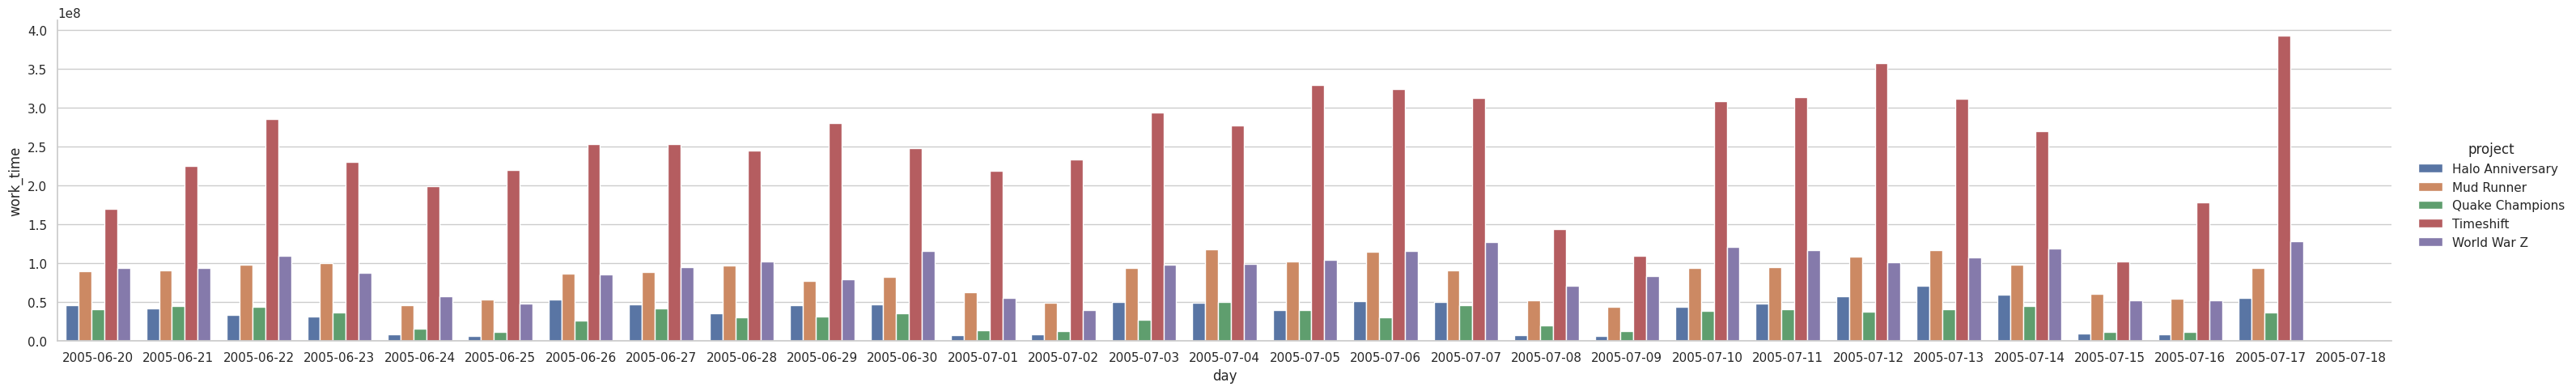

In [ ]:
sns.catplot(data=stat_task_history_df, x='day', y='work_time', hue='project', kind='bar', aspect=6)

### Задача 4

Рассмотрим еженедельное общее потребление ресурсов. На второй неделе можно заметить всплеск нагруки с ее последующим планомерным снижением.

Проанализируйте и сделайте выводы, с чем связано подобное поведение.

Это может быть связано с тем, что `2005-07-01` и `2005-07-02` было большое количество отмен - строк с показателем `status='cancel'`, а так же большое количество провалов - строк с показателем `status='failed'`